In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
train_identity_path = "/Users/xujun/GitRepositories/Kaggle-Fraud-Detection/data/train_identity.csv"
test_identity_path = "/Users/xujun/GitRepositories/Kaggle-Fraud-Detection/data/test_identity.csv"
train_transaction_path = "/Users/xujun/GitRepositories/Kaggle-Fraud-Detection/data/train_transaction.csv"
test_transaction_path = "/Users/xujun/GitRepositories/Kaggle-Fraud-Detection/data/test_transaction.csv"

train_identity_df = pd.read_csv(train_identity_path)
test_identity_df = pd.read_csv(test_identity_path)
train_transaction_df = pd.read_csv(train_transaction_path)
test_transaction_df = pd.read_csv(test_transaction_path)

## 正负样本比例

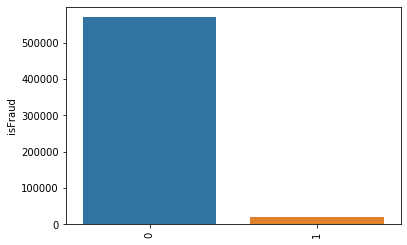

In [10]:

var = 'isFraud'
train_var_count = train_transaction_df[var].value_counts()
fig = sns.barplot(x=train_var_count.index, y=train_var_count)
plt.xticks(rotation=90);

## 合并两部分的特征

In [13]:
train = pd.merge(train_transaction_df, train_identity_df, on='TransactionID', how='left')
test = pd.merge(test_transaction_df, test_identity_df, on='TransactionID', how='left')

In [14]:
del train_transaction_df, train_identity_df, test_transaction_df, test_identity_df

## 有空值的特征数

In [15]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 414 columns in train dataset with missing values.


# 各特征的基本情况
##

### 
id_01 - id_11 are continuous variables
id_12 - id_38 are categorical
the last two columns are obviously also categorical

##

### Transaction Table *

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features:
ProductCD
card1 - card6
addr1, addr2
Pemaildomain Remaildomain
M1 - M9

### Identity Table *

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions. 
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
DeviceType
DeviceInfo
id12 - id38



## 特征工程明细

### 交易ID
'TransactionID'

### label，是否欺诈
'isFraud'

### 交易时间，以某一时刻为起点的秒数
'TransactionDT'

### 交易金额
'TransactionAmt'

### 交易类型
'ProductCD'

### 交易设备的类别（移动终端还是桌面端）
'DeviceType'

### 交易设备的信息（型号）
'DeviceInfo', 

### 发卡机构（visa，mastercard，AE等）
'card4'

### 卡类型（借记卡，信用卡）
'card6'

### 可能信用额度和欠款金额等信息
'card1', 'card2', 'card3', 'card5',

### 地址地区代码
'addr1', 'addr2'


### 距离，distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.
'dist1', 'dist2', 

### 收发邮箱域名
'P_emaildomain', 'R_emaildomain', 


### 一些统计值特征，应该是与账号/卡等实体相关的统计特征
'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 


### 与时间相关的特征：
'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 


### 应该是一些判断条件的真伪
'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 

## 连续值
'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 


### 离散值特征
'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'


### 
'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 

### id_12 - id_38以及'DeviceType', 'DeviceInfo'的数据探索

In [26]:
import altair as alt

for i in ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']:
    feature_count = train[i].value_counts(dropna=False)
    print("{} value counts: ".format(i))
    print(feature_count)

id_12 value counts: 
NaN         446307
NotFound    123025
Found        21208
Name: id_12, dtype: int64
id_15 value counts: 
NaN        449555
Found       67728
New         61612
Unknown     11645
Name: id_15, dtype: int64
id_16 value counts: 
NaN         461200
Found        66324
NotFound     63016
Name: id_16, dtype: int64
id_28 value counts: 
NaN      449562
Found     76232
New       64746
Name: id_28, dtype: int64
id_29 value counts: 
NaN         449562
Found        74926
NotFound     66052
Name: id_29, dtype: int64
id_30 value counts: 
NaN                 512975
Windows 10           21155
Windows 7            13110
iOS 11.2.1            3722
iOS 11.1.2            3699
Android 7.0           2871
Mac OS X 10_12_6      2559
Mac OS X 10_11_6      2348
iOS 11.3.0            2016
Windows 8.1           1914
Mac OS X 10_10_5      1651
iOS 11.2.6            1647
iOS 10.3.3            1558
Mac OS X 10_13_2      1421
Mac OS X 10_13_1      1211
iOS 11.2.5            1200
Linux                

In [27]:
train[['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']].head(20)

,id_12,id_15,id_16,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NotFound,New,NotFound,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NotFound,New,NotFound,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
## 特征全为空的比例
train_id12_id38 = train[['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']]
drop_any_is_null_cnt = train_id12_id38.dropna(how="any").shape[0]
drop_all_is_null_cnt = train_id12_id38.dropna(how="all").shape[0]
drop_eight_is_null_cnt = train_id12_id38.dropna(thresh=8).shape[0]

In [33]:
print("drop_any_is_null_cnt: {}; drop_all_is_null_cnt: {}; drop_eight_is_null_cnt: {}".format(drop_any_is_null_cnt, drop_all_is_null_cnt, drop_eight_is_null_cnt))

drop_any_is_null_cnt: 69543; drop_all_is_null_cnt: 144233; drop_eight_is_null_cnt: 140978


In [36]:
print(list(train.columns))

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

In [37]:
cols = ['id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']

for i in cols:
    feature_count = train[i].value_counts(dropna=False)
    print("{} value counts: ".format(i))
    print(feature_count)

id_13 value counts: 
NaN     463220
52.0     58099
49.0     26365
64.0     14429
33.0     10048
27.0      3666
20.0      2878
14.0      2499
63.0      1468
19.0      1147
25.0      1066
43.0       842
62.0       813
18.0       688
41.0       654
55.0       523
11.0       373
15.0       372
24.0       318
35.0       317
51.0       196
61.0       108
44.0        85
54.0        67
28.0        59
39.0        34
31.0        29
45.0        26
38.0        22
13.0        21
58.0        17
36.0        15
48.0        10
32.0        10
56.0         9
30.0         7
22.0         5
53.0         4
57.0         3
60.0         3
47.0         3
46.0         3
17.0         3
21.0         3
12.0         2
26.0         2
37.0         1
34.0         1
29.0         1
42.0         1
23.0         1
10.0         1
50.0         1
59.0         1
40.0         1
Name: id_13, dtype: int64
id_14 value counts: 
 NaN      510496
-300.0     44121
-360.0     16661
-480.0     12891
-420.0      4542
-600.0       498
 60.0

### id01 - id11

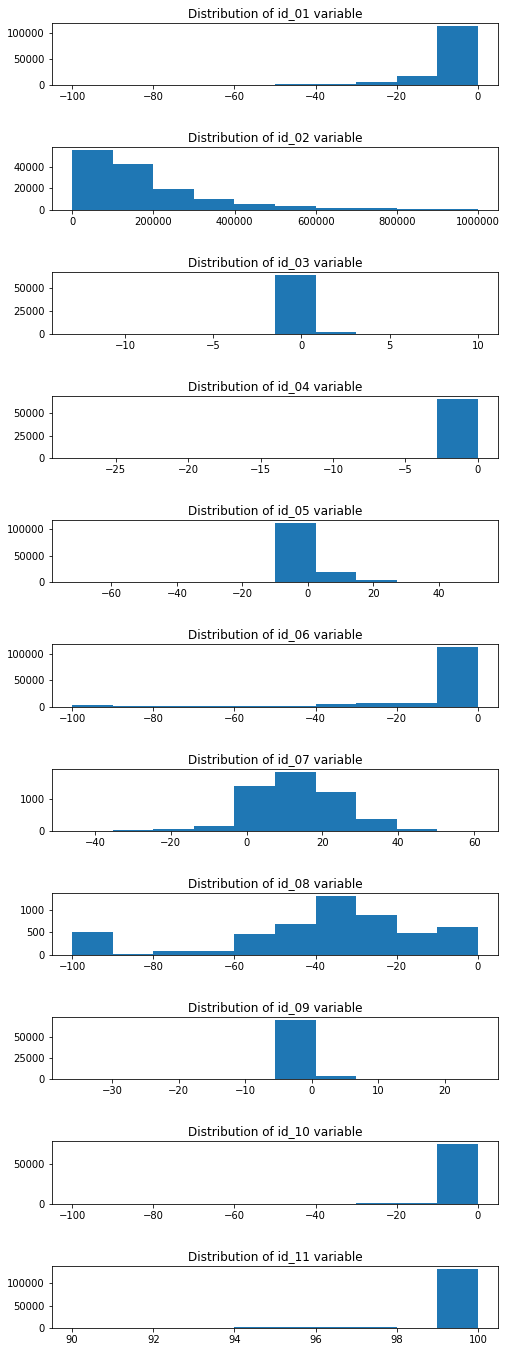

In [69]:
ids = ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11']

plt.figure(figsize=(8,24))

plt.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(ids):
    plt.subplot(11,1,i+1)
    plt.hist(train[col])
    plt.title('Distribution of {} variable'.format(col));

plt.show()

## transaction data数据的探索

In [123]:
train['ProductCD'].tail(20)

590520    W
590521    C
590522    W
590523    W
590524    W
590525    W
590526    R
590527    W
590528    W
590529    C
590530    W
590531    R
590532    W
590533    W
590534    C
590535    W
590536    W
590537    W
590538    W
590539    W
Name: ProductCD, dtype: object

In [58]:
train['TransactionDT'].tail(10)

590530    15810926
590531    15810935
590532    15811007
590533    15811029
590534    15811030
590535    15811047
590536    15811049
590537    15811079
590538    15811088
590539    15811131
Name: TransactionDT, dtype: int64

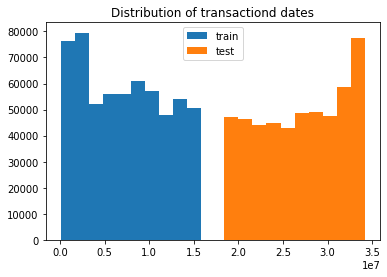

In [51]:
plt.hist(train['TransactionDT'], label='train');
plt.hist(test['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

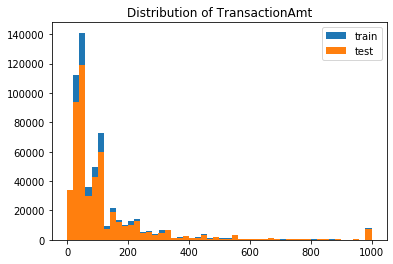

In [56]:

plt.hist(train['TransactionAmt'].where(train['TransactionAmt'] < 1000, 1000), label='train', bins=50);
plt.hist(test['TransactionAmt'].where(test['TransactionAmt'] < 1000, 1000), label='test', bins=50);
plt.legend();
plt.title('Distribution of TransactionAmt');

In [64]:
cols = ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']
for i in cols:
    feature_count = train[i].value_counts(dropna=False)
    print("{} value counts: ".format(i))
    print(feature_count)

ProductCD value counts: 
W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64
card4 value counts: 
visa                384767
mastercard          189217
american express      8328
discover              6651
NaN                   1577
Name: card4, dtype: int64
card6 value counts: 
debit              439938
credit             148986
NaN                  1571
debit or credit        30
charge card            15
Name: card6, dtype: int64
M4 value counts: 
NaN    281444
M0     196405
M2      59865
M1      52826
Name: M4, dtype: int64
M1 value counts: 
T      319415
NaN    271100
F          25
Name: M1, dtype: int64
M2 value counts: 
T      285468
NaN    271100
F       33972
Name: M2, dtype: int64
M3 value counts: 
NaN    271100
T      251731
F       67709
Name: M3, dtype: int64
M5 value counts: 
NaN    350482
F      132491
T      107567
Name: M5, dtype: int64
M6 value counts: 
F      227856
T      193324
NaN    169360
Name: M6, dtype: int64
M7 value count

In [124]:
train[['card4', 'card6','card1', 'card2', 'card3', 'card5']].describe()

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


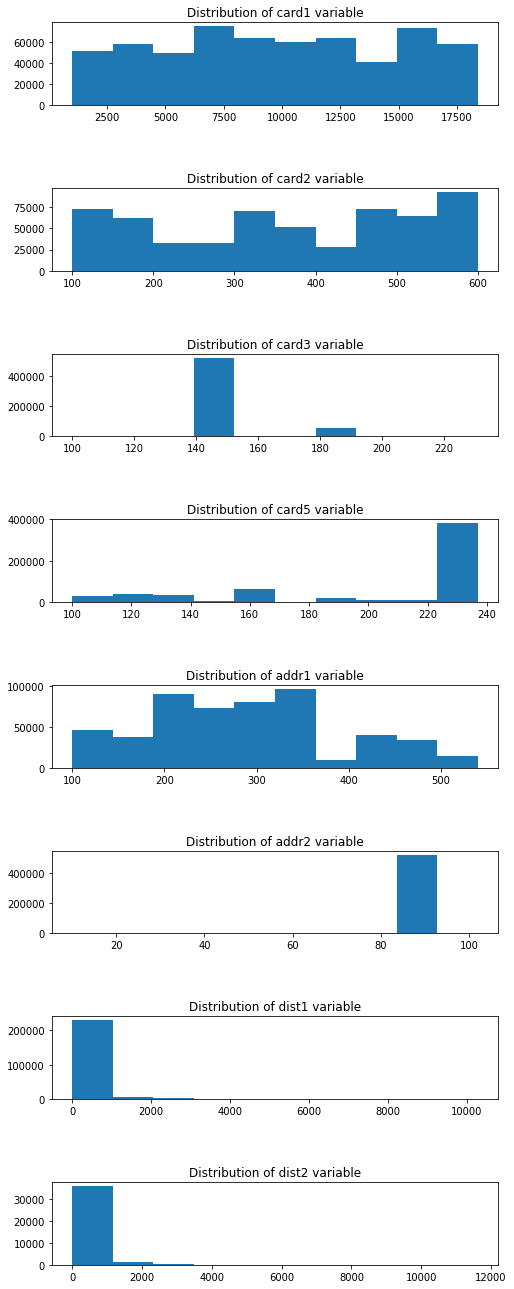

In [82]:
ids = ['card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'dist1', 'dist2']
plt.figure(figsize=(8,32))

plt.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(ids):
    plt.subplot(11,1,i+1)
    plt.hist(train[col])
    plt.title('Distribution of {} variable'.format(col));

plt.show()

In [125]:

cols = ['addr1', 'addr2']
for i in cols:
    feature_count = train[i].value_counts(dropna=False)
    print("{} value counts: ".format(i))
    print(feature_count)

addr1 value counts: 
NaN      65706
299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
184.0    15160
337.0    15149
191.0    14979
181.0    13856
143.0     9806
476.0     9478
310.0     8486
472.0     8478
327.0     8425
512.0     8268
387.0     8187
433.0     7831
231.0     7605
485.0     6816
269.0     6404
205.0     5725
225.0     5323
251.0     5216
494.0     5065
         ...  
352.0        1
213.0        1
211.0        1
306.0        1
358.0        1
244.0        1
361.0        1
365.0        1
368.0        1
200.0        1
196.0        1
195.0        1
219.0        1
481.0        1
347.0        1
223.0        1
128.0        1
120.0        1
227.0        1
340.0        1
232.0        1
233.0        1
234.0        1
235.0        1
237.0        1
238.0        1
338.0        1
241.0        1
243.0        1
353.0        1
Name: addr1, Length: 333, dtype: int64
addr2 value counts: 
87.0

In [83]:
train[ids].tail(20)

,card1,card2,card3,card5,addr1,addr2,dist1,dist2
590520,17150,292.0,150.0,226.0,204.0,87.0,4.0,NaN
590521,12019,305.0,106.0,224.0,NaN,NaN,NaN,0.0
590522,3166,559.0,150.0,166.0,325.0,87.0,2.0,NaN
590523,13076,456.0,150.0,117.0,299.0,87.0,NaN,NaN
590524,7826,481.0,150.0,224.0,387.0,87.0,NaN,NaN
590525,11942,570.0,150.0,226.0,310.0,87.0,12.0,NaN
590526,1214,174.0,150.0,226.0,272.0,87.0,NaN,NaN
590527,6453,555.0,150.0,226.0,264.0,87.0,NaN,NaN
590528,15066,170.0,150.0,102.0,299.0,87.0,NaN,NaN
590529,5096,555.0,185.0,137.0,NaN,NaN,NaN,NaN


In [ ]:
train['P_emaildomain'].value_counts(dropna=False)
train['R_emaildomain'].value_counts(dropna=False)

In [78]:
train[['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']].tail(20)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
590520,56.0,56.0,23.0,290.0,145.0,NaN,NaN,NaN,NaN,661.0,290.0,NaN,NaN,NaN,661.0
590521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.958333,0.958333,0.0,NaN,0.0,0.0,0.0,0.0
590522,309.0,309.0,32.0,448.0,32.0,NaN,NaN,NaN,NaN,309.0,448.0,NaN,NaN,NaN,309.0
590523,7.0,7.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,8.0
590524,0.0,NaN,NaN,240.0,68.0,NaN,NaN,NaN,NaN,68.0,0.0,NaN,NaN,NaN,340.0
590525,633.0,633.0,15.0,652.0,15.0,NaN,NaN,NaN,NaN,133.0,644.0,NaN,NaN,NaN,652.0
590526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590527,14.0,10.0,6.0,15.0,10.0,NaN,NaN,NaN,NaN,15.0,0.0,NaN,NaN,NaN,15.0
590528,0.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,1.0
590529,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,252.0,0.0


In [79]:
train[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']].tail(20)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
590520,5.0,3.0,0.0,0.0,4.0,3.0,0.0,0.0,2.0,0.0,3.0,0.0,10.0,5.0
590521,1.0,9.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0
590522,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,7.0,2.0
590523,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
590524,3.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,1.0,0.0,5.0,3.0
590525,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,19.0,1.0
590526,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
590527,4.0,3.0,0.0,0.0,5.0,3.0,0.0,0.0,3.0,0.0,3.0,0.0,6.0,3.0
590528,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0
590529,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [126]:
train[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.072870,1.027704,1.041529,0.463915,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,0.007390,0.240133,0.320890,0.440053,0.475902,0.239385,0.304779,0.186069,0.226339,0.521522,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.000000,9.000000,6.000000,6.000000,9.000000,9.000000,8.000000,8.000000,4.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


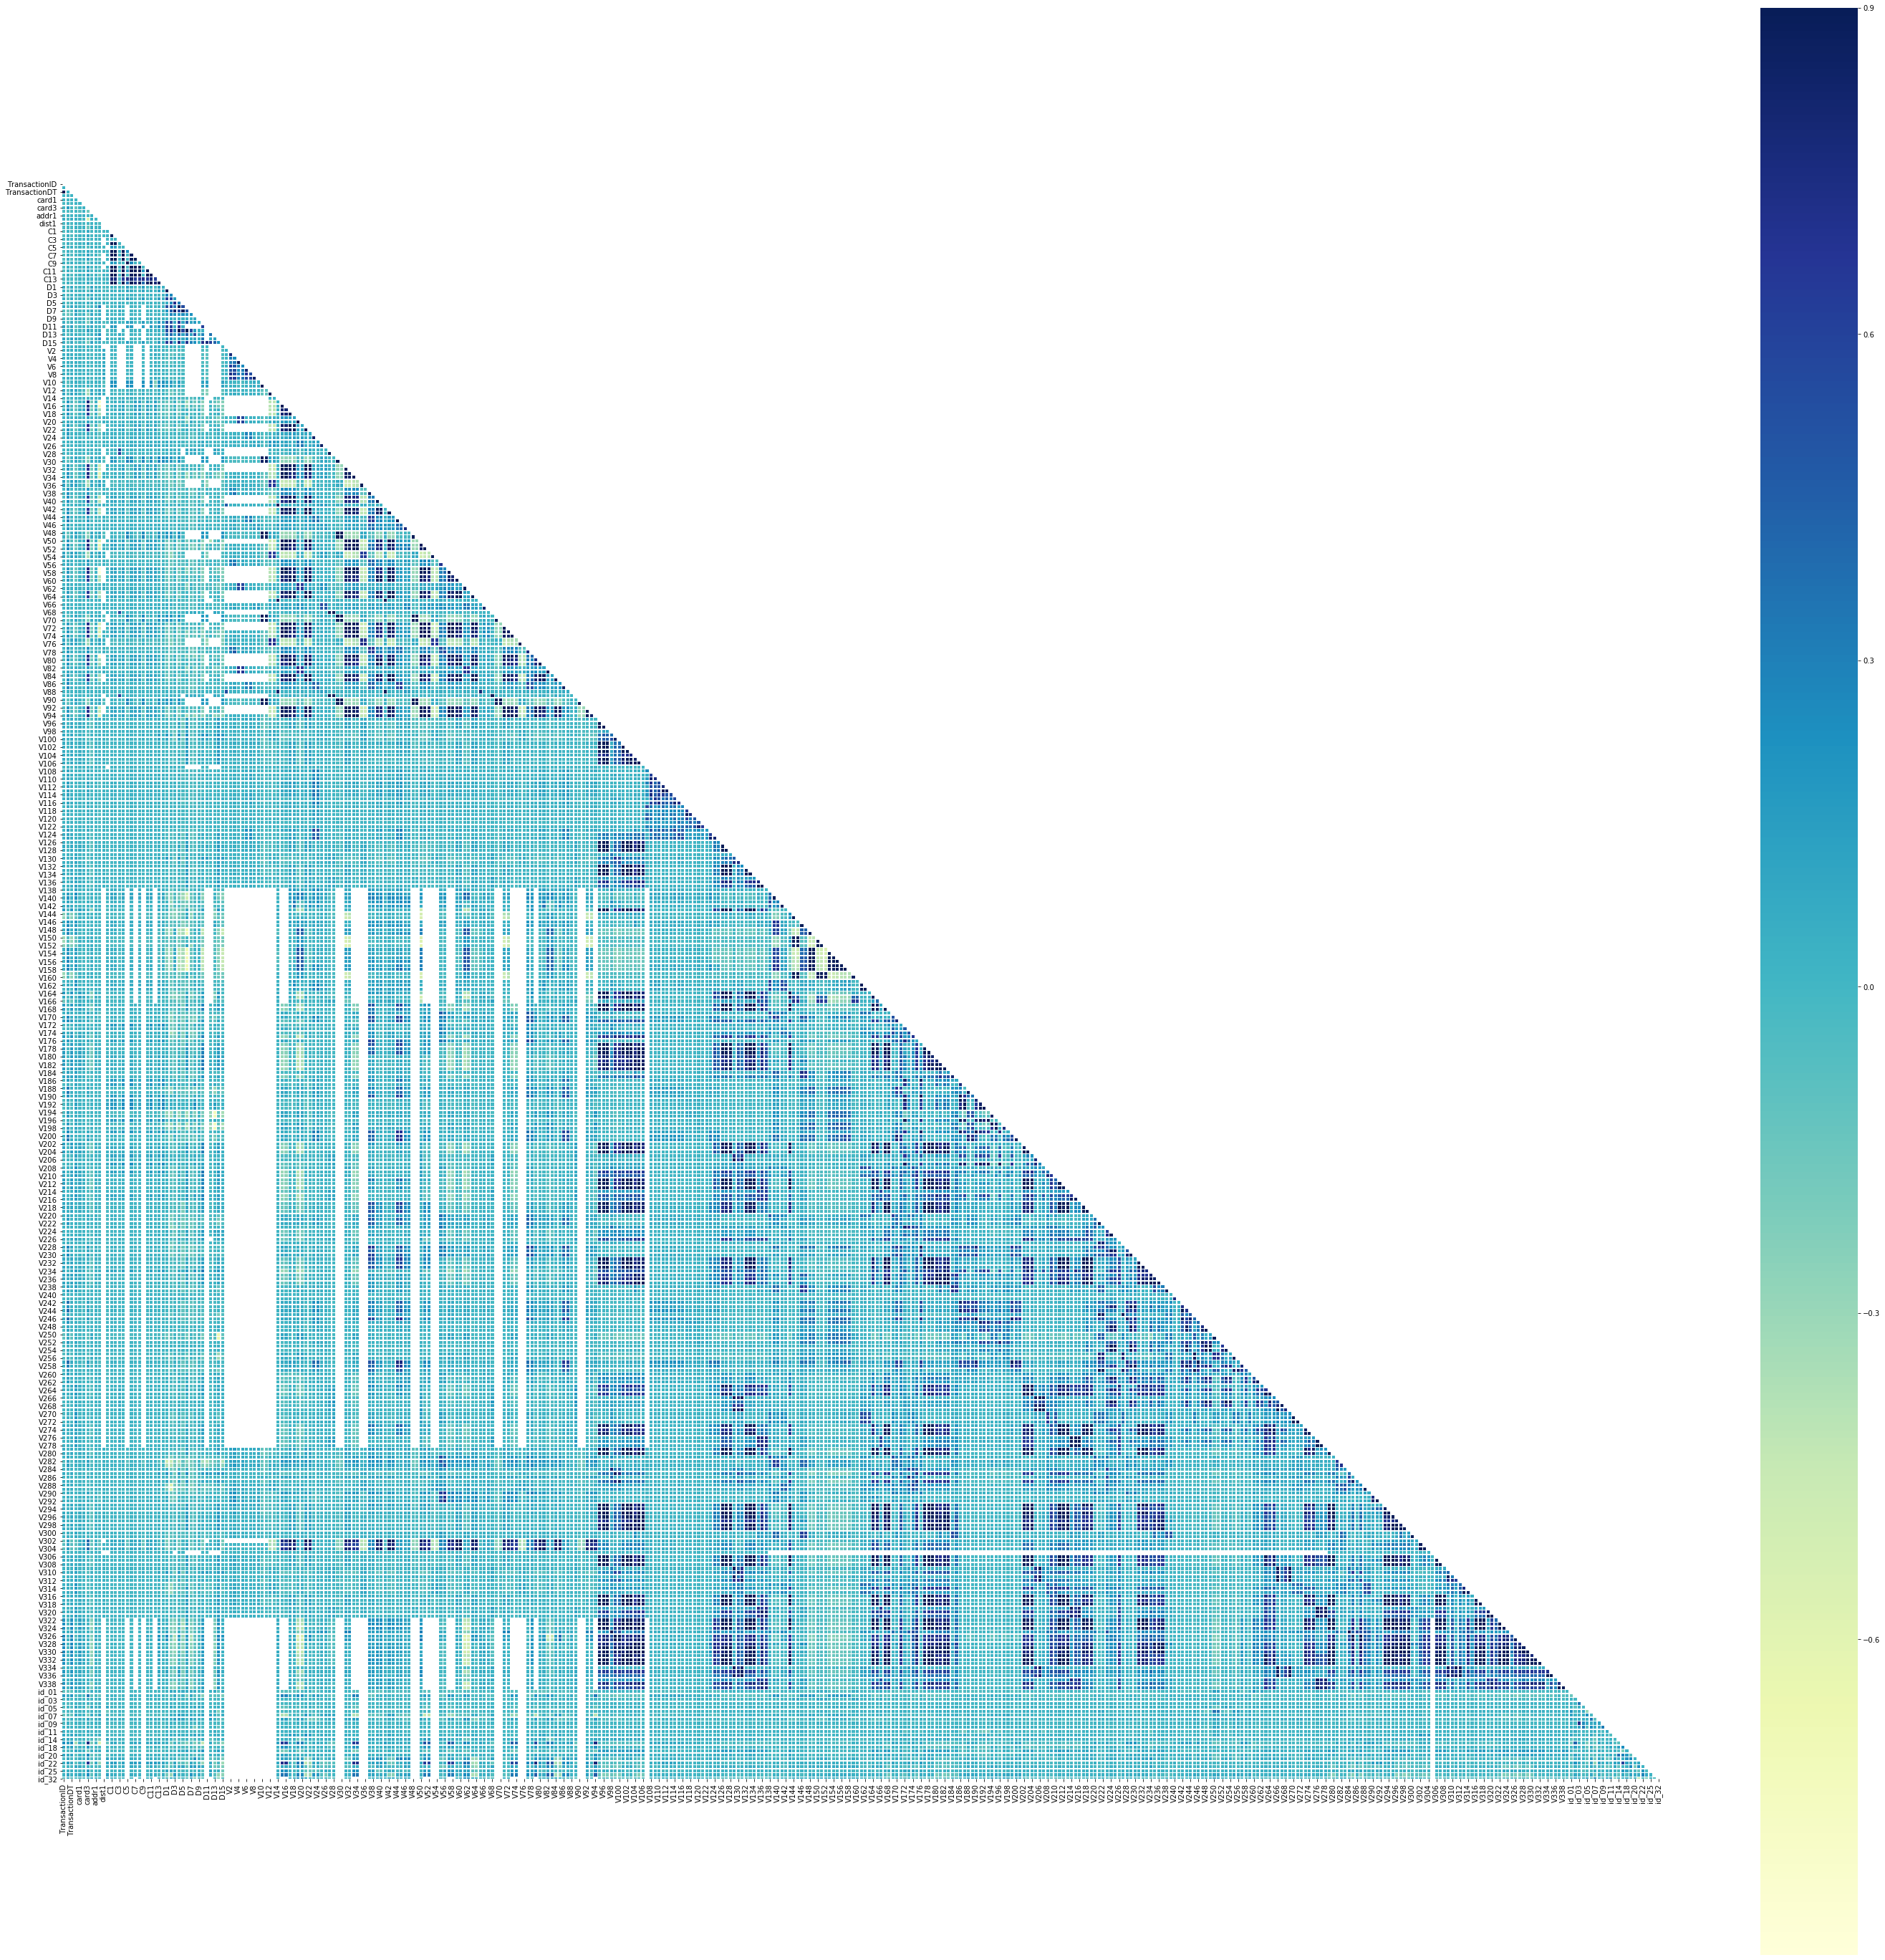

In [87]:
# 关系矩阵
corrmat = train.corr()
mask = np.zeros_like(corrmat) # 返回相同大小的0矩阵
mask[np.triu_indices_from(mask)] = True # triu_indices_from: 函数的上三角矩阵
# 绘制热力图
plt.subplots(figsize=(50,50))
sns.heatmap(corrmat, mask=mask, linewidths=.5, vmax=0.9, square=True, cmap="YlGnBu")

In [104]:
high_correlation_col = corrmat.to_numpy()

In [106]:
cols_index = np.argwhere(high_correlation_col >= 0.9)

/anaconda3/envs/handsonML/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


In [108]:
res = [index for index in cols_index if index[0] != index[1]]

In [118]:
## 特征相关性
features_correlation_graph = "/Users/xujun/GitRepositories/Kaggle-Fraud-Detection/fea_cor_high_edges_graph.csv"

features_correlation_graph_df = pd.read_csv(features_correlation_graph)

In [131]:
features_cols = [(i, col) for i, col in enumerate(list(train.columns))]

In [137]:
features_cols_df = pd.DataFrame({'id': list(range(len(list(train.columns)))), 'col_name': list(train.columns)})

In [139]:
corr_fea_clu_df = pd.merge(features_correlation_graph_df, features_cols_df, on='id', how='left')

In [143]:
corr_fea_clu_df.sort_values(by='modularity_class')

,id,triangles,modularity_class,col_name
0,0,0,0,TransactionID
1,2,0,0,TransactionDT
11,25,10,1,C9
10,23,15,1,C7
8,21,24,1,C5
7,19,24,1,C3
9,22,28,1,C6
5,17,19,1,C1
4,15,19,1,P_emaildomain
3,13,28,1,dist1


## 特征工程尝试-1


from: https://www.kaggle.com/artgor/eda-and-models

In [150]:
train_try1 = train.copy()

In [151]:
train['TransactionAmt_to_mean_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_mean_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_std_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('std')
train['TransactionAmt_to_std_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('std')

test['TransactionAmt_to_mean_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_mean_card4'] = test['TransactionAmt'] / test.groupby(['card4'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_std_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('std')
test['TransactionAmt_to_std_card4'] = test['TransactionAmt'] / test.groupby(['card4'])['TransactionAmt'].transform('std')

train['id_02_to_mean_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('mean')
train['id_02_to_mean_card4'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('mean')
train['id_02_to_std_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('std')
train['id_02_to_std_card4'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('std')

test['id_02_to_mean_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('mean')
test['id_02_to_mean_card4'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('mean')
test['id_02_to_std_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('std')
test['id_02_to_std_card4'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('std')

train['D15_to_mean_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('mean')
train['D15_to_mean_card4'] = train['D15'] / train.groupby(['card4'])['D15'].transform('mean')
train['D15_to_std_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('std')
train['D15_to_std_card4'] = train['D15'] / train.groupby(['card4'])['D15'].transform('std')

test['D15_to_mean_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('mean')
test['D15_to_mean_card4'] = test['D15'] / test.groupby(['card4'])['D15'].transform('mean')
test['D15_to_std_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('std')
test['D15_to_std_card4'] = test['D15'] / test.groupby(['card4'])['D15'].transform('std')

train['D15_to_mean_addr1'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('mean')
train['D15_to_mean_addr2'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('mean')
train['D15_to_std_addr1'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('std')
train['D15_to_std_addr2'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('std')

test['D15_to_mean_addr1'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('mean')
test['D15_to_mean_addr2'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('mean')
test['D15_to_std_addr1'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('std')
test['D15_to_std_addr2'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('std')


train[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = train['P_emaildomain'].str.split('.', expand=True)
train[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = train['R_emaildomain'].str.split('.', expand=True)
test[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = test['P_emaildomain'].str.split('.', expand=True)
test[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = test['R_emaildomain'].str.split('.', expand=True)

False

In [ ]:



import os
import time
import datetime
import json
import gc
import xgboost as xgb


many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test + one_value_cols+ one_value_cols_test))
cols_to_drop.remove('isFraud')

train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)

cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
            'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']
for col in cat_cols:
    if col in train.columns:
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))
        test[col] = le.transform(list(test[col].astype(str).values))
        
X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y = train.sort_values('TransactionDT')['isFraud']
#X_test = test.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)
X_test = test.drop(['TransactionDT', 'TransactionID'], axis=1)
del train
test = test[["TransactionDT", 'TransactionID']]

# by https://www.kaggle.com/dimartinot
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
X = clean_inf_nan(X)
X_test = clean_inf_nan(X_test)
gc.collect()


n_fold = 5
folds = TimeSeriesSplit(n_splits=n_fold)
folds = KFold(n_splits=5)

params = {'num_leaves': 256,
          'min_child_samples': 79,
          'objective': 'binary',
          'max_depth': 13,
          'learning_rate': 0.03,
          "boosting_type": "gbdt",
          "subsample_freq": 3,
          "subsample": 0.9,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3,
          'reg_lambda': 0.3,
          'colsample_bytree': 0.9,
          #'categorical_feature': cat_cols
         }
result_dict_lgb = train_model_classification(X=X, X_test=X_test, y=y, params=params, folds=folds, model_type='lgb', eval_metric='auc', plot_feature_importance=True,
                                                      verbose=500, early_stopping_rounds=200, n_estimators=5000, averaging='usual', n_jobs=-1)

In [ ]:
sub['isFraud'] = result_dict_lgb['prediction']
sub.to_csv('submission.csv', index=False)
sub.head()
pd.DataFrame(result_dict_lgb['oof']).to_csv('lgb_oof.csv', index=False)

In [ ]:
# xgb_params = {'eta': 0.04,
#               'max_depth': 5,
#               'subsample': 0.85,
#               'objective': 'binary:logistic',
#               'eval_metric': 'auc',
#               'silent': True,
#               'nthread': -1,
#               'tree_method': 'gpu_hist'}
# result_dict_xgb = train_model_classification(X=X, X_test=X_test, y=y, params=xgb_params, folds=folds, model_type='xgb', eval_metric='auc', plot_feature_importance=False,
#                                                       verbose=500, early_stopping_rounds=200, n_estimators=5000, averaging='rank')

# test = test.sort_values('TransactionDT')
# test['prediction'] = result_dict_xgb['prediction']
# sub['isFraud'] = pd.merge(sub, test, on='TransactionID')['prediction']
# sub.to_csv('submission_xgb.csv', index=False)

# test = test.sort_values('TransactionDT')
# test['prediction'] = result_dict_lgb['prediction'] + result_dict_xgb['prediction']
# sub['isFraud'] = pd.merge(sub, test, on='TransactionID')['prediction']
# sub.to_csv('blend.csv', index=False)

# 特征工程-2

from: https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt